# TUGAS 5 : MINI PROJECT
**FITRA NUVUS SALSABILA | G5501211009**

### PART 1: Visualisasi dan Deskripsi Data Saham

In [1]:
using CSV
using DataFrames

In [2]:
ENV["LINES"]=10 #membatasi jumlah baris yang ditampilkan tabel

10

Deskripsi akronim dari nama saham.

In [3]:
nama_saham=CSV.read("Data 1_deskripsi.csv", DataFrame)

,Kode,Nama
,String,String
1,WIKA,Wijaya Karya (Persero) Tbk.
2,BISI,BISI International Tbk.
3,BSDE,Bumi Serpong Damai Tbk.
4,NIKL,Pelat Timah Nusantara Tbk.


*Historical prices* keempat saham pada Januari 2010-Desember 2020.

In [4]:
data_saham=CSV.read("Data1_saham_sorted.csv", DataFrame)

,Waktu,WIKA,BISI,BSDE,NIKL
,String,Int64,Int64,Int64,Int64
1,January 2010,292,1540,780,255
2,February 2010,310,1380,566,235
3,March 2010,324,1480,566,295
4,April 2010,394,1810,780,340
5,May 2010,329,1280,640,270
6,June 2010,398,1340,668,295
7,July 2010,500,1470,752,315
8,August 2010,546,1700,761,310
9,September 2010,620,2250,891,380


Dataset *return* saham pada Januari 2010-Desember 2020 

In [5]:
data_return=CSV.read("Data1_return_sorted.csv", DataFrame)

,Waktu,WIKA,BISI,BSDE,NIKL
,String,Float64,Float64,Float64,Float64
1,January 2010,-0.0308,0.1407,-0.0455,0.0
2,February 2010,0.0635,-0.1039,-0.2738,-0.0784
3,March 2010,0.0448,0.0725,0.0,0.2553
4,April 2010,0.2143,0.223,0.377,0.1525
5,May 2010,-0.1647,-0.2928,-0.1786,-0.2059
6,June 2010,0.2113,0.0469,0.0435,0.0926
7,July 2010,0.2558,0.097,0.125,0.0678
8,August 2010,0.0926,0.1565,0.0123,-0.0159
9,September 2010,0.1356,0.3235,0.1707,0.2258


**1.1 Visualisasi data harga saham dengan *line plot* atau *scatter* (wajib)**

In [6]:
using Plots
using WebIO
plotlyjs()

WebIO._IJuliaInit()

Plots.PlotlyJSBackend()

**Grafik *Historical Prices* Januari 2010-Desember 2020 masing-masing saham**

In [7]:
using Measures

In [8]:
x=data_saham[:,1]
p1 = plot(x,data_saham[:,2], title="WIKA", color=:red, label=false)
p2 = plot(x,data_saham[:,3], title="BISI", color=:green, label=false)
p3 = plot(x,data_saham[:,4], title="BSDE", color=:gold, label=false)
p4 = plot(x,data_saham[:,5], title="NIKL", color=:darkblue, label=false)
plot(p1, p2, p3, p4, layout = (1, 4), xrotation=90, size=(1000,300), legend=false)
xlabel!("Waktu")
ylabel!("Harga Saham")

WIKA : Harga tertinggi terjadi pada periode antara Agustus 2014-Oktober 2015

BISI : Harga tertinggi terjadi pada periode antara Januari 2010-Februari 2011

BSDE : Harga tertinggi terjadi pada periode antara April 2012-Juni 2013

NIKL : Harga tertinggi terjadi pada periode antara Desember 2016-Februari 2018

**Grafik *historical prices* masing-masing saham setiap tahun sejak tahun 2010-2020**

In [9]:
x=data_saham[:,1]
saham=Matrix(data_saham[:,2:end])
plot(x,saham, 
     xrotation=45, 
     labels=["WIKA" "BISI" "BSDE" "NIKL"], 
     title="Historical Prices Periode Januari 2010-Desember 2020", 
     titlefontsize=9,
     color=[:red :green :gold :darkblue])

Secara keseluruhan, pada periode Januari 2010-Desember 2020, harga saham tertinggi adalah saham NIKL. Sejak tahun 2010 saham NIKL berada di posisi terbawah bila dibandingkan dengan ketiga saham lainnya. Namun, pada Desember 2016 hingga April 2019, terjadi peningkatan. Memasuki April 2019, harga saham NIKL kembali menurun. Adapun perubahan harga saham WIKA, BISI, dan BSDE tidak mengalami perubah sedrastis saham NIKL.

**Grafik *return* masing-masing saham pada Januari 2010-Desember 2020**

In [10]:
x=data_return[:,1]
p1 = plot(x, data_return[:,2], title="WIKA", label=false, color=:red)
p2 = plot(x,data_return[:,3], title="BISI", label=false, color=:green)
p3 = plot(x,data_return[:,4], title="BSDE", label=false, color=:gold)
p4 = plot(x,data_return[:,5], title="NIKL", label=false, color=:darkblue)
plot(p1, p2, p3, p4, layout = (4, 1), xrotation=90, size=(500,1000), left_margin=20mm)
xlabel!("Waktu")
ylabel!("Return")

**1.2 Visualisasi dengan tipe grafik pilihan**

In [11]:
using StatsPlots

Data saham diolah menjadi data rata-rata harga saham per tahun

In [12]:
data_rata=CSV.read("Data1_rata-rata.csv", DataFrame)

,Tahun,WIKA,BISI,BSDE,NIKL
,Int64,Int64,Int64,Int64,Int64
1,2010,466,1705,756,330
2,2011,564,1279,887,338
3,2012,1007,933,1178,235
4,2013,1887,715,1638,201
5,2014,2391,573,1598,154
6,2015,2773,1291,1810,84
7,2016,2530,1724,1925,625
8,2017,2128,1678,1787,3686
9,2018,1583,1715,1492,4097


***Bar chart*  rata-rata harga masing-masing saham dari tahun 2010-2020**

In [13]:
bar(string.(collect(2010:2020)),[data_rata[:,2]][:], 
            bar_width=0.7, 
            title="Rata-Rata Harga Saham WIKA Tahun 2010-2020",
            ylabel="Rata-Rata Harga Saham",
            xrotation=45, 
            color=:red,
            alpha=0.7,
            size=(500,300),
            legend=false)

Rata-rata harga saham WIKA tertinggi terjadi pada tahun 2015

In [14]:
bar(string.(collect(2010:2020)),[data_rata[:,3]][:], 
            bar_width=0.7, 
            title="Rata-Rata Harga Saham BISI Tahun 2010-2020",
            ylabel="Rata-Rata Harga Saham",
            color=:green,
            alpha=0.7,
            xrotation=45, 
            size=(500,300),
            legend=false)

Rata-rata harga saham BISI tertinggi terjadi pada tahun 2016

In [15]:
bar(string.(collect(2010:2020)),[data_rata[:,4]][:], 
            bar_width=0.7, 
            title="Rata-Rata Harga Saham BSDE Tahun 2010-2020",
            ylabel="Rata-Rata Harga Saham",
            color=:gold,
            alpha=0.7,
            xrotation=45, 
            size=(500,300),
            label=false)

Rata-rata harga saham BSDE tertinggi terjadi pada tahun 2016

In [16]:
bar(string.(collect(2010:2020)),[data_rata[:,5]][:], 
            bar_width=0.7, 
            title="Rata-Rata Harga Saham NIKL Tahun 2010-2020",
            ylabel="Rata-Rata Harga Saham",
            xrotation=45,
            color=:darkblue,
            alpha=0.7,
            size=(500,300),
            legend=false)

Rata-rata harga saham NIKL tertinggi terjadi pada tahun 2018

**Visualisasi perbandingan rata-rata harga masing-masing saham dari tahun 2010-2020**

In [17]:
rata_2010=data_rata[1,2:5]
rata_2011=data_rata[2,2:5]
rata_2012=data_rata[3,2:5]
rata_2013=data_rata[4,2:5]
rata_2014=data_rata[5,2:5]
rata_2015=data_rata[6,2:5]
rata_2016=data_rata[7,2:5]
rata_2017=data_rata[8,2:5]
rata_2018=data_rata[9,2:5]
rata_2019=data_rata[10,2:5]
rata_2020=data_rata[11,2:5]

,WIKA,BISI,BSDE,NIKL
,Int64,Int64,Int64,Int64
11,1348,903,853,683


In [18]:
rata2010=collect(rata_2010)
rata2011=collect(rata_2011)
rata2012=collect(rata_2012)
rata2013=collect(rata_2013)
rata2014=collect(rata_2014)
rata2015=collect(rata_2015)
rata2016=collect(rata_2016)
rata2017=collect(rata_2017)
rata2018=collect(rata_2018)
rata2019=collect(rata_2019)
rata2020=collect(rata_2020)

4-element Array{Int64,1}:
 1348
  903
  853
  683

In [19]:
saham=DataFrame(nama=["WIKA", "BISI", "BSDE", "NIKL"])
ket_saham = saham[:,1]
groupedbar([rata2010 rata2011 rata2012 rata2013 rata2014 rata2015 rata2016 rata2017 rata2018 rata2019 rata2020],
            bar_position = :dodge, 
            bar_width=0.7, 
            xticks=(1:4, ket_saham),
            labels=["2010" "2011" "2012" "2013" "2014" "2015" "2016" "2017" "2018" "2019" "2020"],
            legend=:top,
            ylabel="Rata-Rata Harga Saham",
            xrotation=45, 
            color=[:red :green :white :yellow :gray :orange :purple :chocolate :darkgreen :gold :darkblue],
            alpha=0.7,
            size=(700,400))

In [20]:
waktu=DataFrame(bulan=["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"])
ket_waktu = waktu[:,1]
groupedbar([data_rata[:,2] data_rata[:,3] data_rata[:,4] data_rata[:,5]],
            bar_position = :dodge, 
            bar_width=0.7, 
            xticks=(1:11, ket_waktu),
            labels=["WIKA" "BISI" "BSDE" "NIKL"],
            legend=:top,
            ylabel="Rata-Rata Harga Saham",
            xrotation=45, 
            color=[:red :green :gold :darkblue],
            alpha=0.7,
            size=(700,400))

Berdasarkan *groupedbar* 1 dan 2, dapat dilihat bahwa tidak terjadi perubahan harga yang drastis pada saham WIKA, BISI, dan BSDE. Namun, terjadi peningkatan rata-rata harga saham yang sangat drastis pada saham NIKL, sejak tahun 2017, dengan puncaknya pada tahun 2018. Kemudian, terjadi penurunan kembali yang cukup drastis pada tahun 2019. 

In [21]:
monthly_WIKA1020=CSV.read("monthly WIKA 2010-2020.csv", DataFrame)

,Date,Open,High,Low,Close,Adj Close,Volume
,Date…,Float64,Float64,Float64,Float64,Float64,Int64
1,2010-01-01,300.974,314.865,291.713,291.713,235.959,109846571
2,2010-02-01,287.083,314.865,277.822,310.235,250.94,114454202
3,2010-03-01,310.235,338.017,300.974,324.126,262.176,381932454
4,2010-04-01,324.126,407.472,319.495,393.581,318.357,1675974031
5,2010-05-01,384.32,398.212,287.083,328.756,265.922,436709967
6,2010-06-01,314.865,421.363,300.974,398.212,331.735,581868547
7,2010-07-01,393.581,527.862,384.32,500.08,416.598,776160920
8,2010-08-01,481.558,583.426,453.776,546.383,455.172,583426198
9,2010-09-01,564.905,685.294,537.123,620.469,516.89,765890136


**Visualisasi *historical prices* saham WIKA per bulan selama tahun 2010-2020 dengan grafik *candlestick***

In [22]:
using PlotlyJS

In [23]:
candle1=PlotlyJS.plot(candlestick(
        x=monthly_WIKA1020[:,"Date"],
        open=monthly_WIKA1020[:, "Open"],
        high=monthly_WIKA1020[:, "High"],
        low=monthly_WIKA1020[:, "Low"],
        close=monthly_WIKA1020[:, "Close"]),
        
        Layout(xaxis_rangeslider_visible=false, 
               title="Candlestick Saham WIKA Per Bulan Periode Tahun 2010-2020",
               xaxis_title="Waktu", yaxis_title="Harga Saham")
        )

PlotlyJS.savefig(candle1,"C:\\Users\\USER\\KOMPUTASI MATEMATIKA\\TUGAS 5\\candle_WIKA2010-2020.html")

"C:\\Users\\USER\\KOMPUTASI MATEMATIKA\\TUGAS 5\\candle_WIKA2010-2020.html"

**1.3 Deskripsi statistik masing-masing saham**

In [24]:
using StatsBase

**Deskripsi statistik saham WIKA**

In [25]:
describe(data_saham[:,2])

Summary Stats:
Length:         132
Missing Count:  0
Mean:           1700.454545
Minimum:        292.000000
1st Quartile:   972.000000
Median:         1797.500000
3rd Quartile:   2372.500000
Maximum:        3468.000000
Type:           Int64


**Deskripsi statistik saham BISI**

In [26]:
describe(data_saham[:,3])

Summary Stats:
Length:         132
Missing Count:  0
Mean:           1259.916667
Minimum:        490.000000
1st Quartile:   875.000000
Median:         1327.500000
3rd Quartile:   1665.000000
Maximum:        2350.000000
Type:           Int64


**Deskripsi statistik saham BSDE**

In [27]:
describe(data_saham[:,4])

Summary Stats:
Length:         132
Missing Count:  0
Mean:           1386.015152
Minimum:        566.000000
1st Quartile:   1035.000000
Median:         1417.500000
3rd Quartile:   1735.000000
Maximum:        2220.000000
Type:           Int64


**Deskripsi statistik saham NIKL**

In [28]:
describe(data_saham[:,5])

Summary Stats:
Length:         132
Missing Count:  0
Mean:           1103.742424
Minimum:        50.000000
1st Quartile:   188.500000
Median:         335.000000
3rd Quartile:   1335.000000
Maximum:        5125.000000
Type:           Int64


### PART 2: ANALISIS MOVING AVERAGE

*Uptrend vs Downtrend*
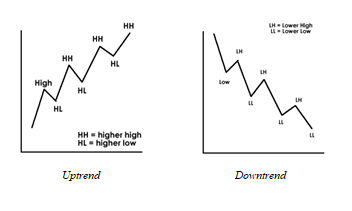

*Moving Average* :
pergerakan nilai rata-rata, *technical analysis*, *trend indicator*, *lagging indicator*

In [29]:
using MarketTechnicals

Dokumentasi : https://juliaquant.github.io/MarketTechnicals.jl/latest/ma.html

**2.1 Analisis harga saham WIKA per bulan menggunakan *Simple Moving Average***

*Simple Moving Average* (SMA) adalah perhitungan yang mengambil rata-rata dari sekumpulan 
harga selama periode waktu tertentu di masa lalu. 

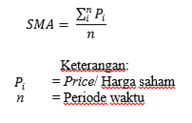

Berikut ini adalah contoh komputasi perhitungan SMA:

In [30]:
sum(monthly_WIKA1020[1:12,5])/12

466.1236190833333

In [31]:
mean(monthly_WIKA1020[1:12,5])

466.1236190833333

Berikut ini adalah komputasi perhitungan SMA dengan menggunakan paket MarketTechnicals.Jl:

In [113]:
m_WIKA_SMA=sma(monthly_WIKA1020[1:121,5],12) #monthly_WIKA1020[1:121,5] = data saham WIKA pada tahun 2010-2019

x=string.(monthly_WIKA1020[:,1])
plot(x, monthly_WIKA1020[:,5], rotation=45, 
        title="Analisis Harga Saham WIKA per Bulan Menggunakan SMA12", 
        titlefontsize=10, 
        label="Data",
        xlabel="Periode Waktu",
        ylabel="Harga Saham",
        legend=:outertopright)

plot!(string.(monthly_WIKA1020[12:121,1]),m_WIKA_SMA, label="Analisis SMA12", color=:red)

Periode 2010-2015:
1. Pola pergerakan -> L-H-LH-HH-HL-HH-HL -> *uptrend*
2. Harga saham di atas garis SMA12 -> *uptrend*

Periode 2015-2019:
1. Pola pergerakan -> H-L-LH-LL-LH -> *downtrend*
2. Harga saham di bawah garis SMA12 -> *downtrend*
3. Sekitar tahun 2019, garis SMA12 memotong garis harga dari bawah -> peralihan menuju kondisi turun

Prediksi tahun 2020: *bearish* atau turun

In [33]:
using DelimitedFiles


Berikut ini adalah titik data yang diperoleh dari SMA:

In [34]:
A=round.(m_WIKA_SMA;digits=3)

110×1 Array{Float64,2}:
  466.124
  488.89
  513.971
    ⋮
 2094.167
 2093.75

In [35]:
writedlm( "df_SMA.csv",  A, ',')

Data disimpan dalam bentuk csv untuk keperluan penampilan data di laporan

**2.2 Analisis harga saham WIKA per bulan menggunakan *Exponential Moving Average***

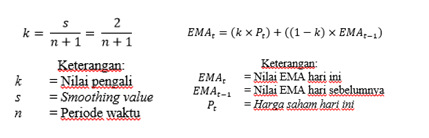

Berikut ini adalah contoh komputasi perhitungan EMA:

In [36]:
k=2/(12+1)

0.15384615384615385

In [37]:
k*monthly_WIKA1020[13,5]+(1-k)*mean(monthly_WIKA1020[1:12,5])

481.32072153205127

Berikut ini adalah komputasi perhitungan EMA dengan menggunakan paket MarketTechnicals.Jl:

In [114]:
m_WIKA_EMA=ema(monthly_WIKA1020[1:121,5],12, wilder=false) #Jika parameter wilder=true, maka k dihitung dengan rumus k=1/n

x=string.(monthly_WIKA1020[:,1])
plot(x, monthly_WIKA1020[:,5], rotation=45, 
        title="Analisis Harga Saham WIKA per Bulan Menggunakan EMA12", 
        titlefontsize=10, 
        label="Data",
        xlabel="Periode Waktu",
        ylabel="Harga Saham",
        legend=:outertopright)
plot!(string.(monthly_WIKA1020[12:121,1]),m_WIKA_EMA, label="Analisis EMA12", color=:red)

Periode 2010-2015:
1. Pola pergerakan -> L-H-LH-HH-HL-HH-HL -> *uptrend*
2. Harga saham di atas garis EMA12 -> *uptrend*

Periode 2015-2019:
1. Pola pergerakan -> H-L-LH-LL-LH -> *downtrend*
2. Harga saham di bawah garis EMA12 -> *downtrend*
3. Sekitar tahun 2019, garis EMA12 memotong garis harga dari bawah -> peralihan menuju kondisi turun

Prediksi tahun 2020: *bearish* atau turun


Berikut ini adalah titik data yang diperoleh dari perhitungan EMA:

In [39]:
B=round.(m_WIKA_EMA; digits=3)

110×1 Array{Float64,2}:
  466.124
  481.321
  501.303
    ⋮
 1988.267
 1973.149

In [40]:
writedlm( "df_EMA.csv",  B, ',')

Data disimpan dalam bentuk csv untuk keperluan penampilan data di laporan

**2.3 Perbandingan *Simple Moving Average* dan *Exponential Moving Average***

In [115]:
x=string.(monthly_WIKA1020[:,1])
plot(x, monthly_WIKA1020[:,5], rotation=45, 
        title="Perbandingan Analisis Harga Saham WIKA per Bulan<br>Menggunakan SMA 12 dan EMA12", 
        titlefontsize=10, 
        label="Data",
        xlabel="Periode Waktu",
        ylabel="Harga Saham",
        legend=:outertopright)
plot!(string.(monthly_WIKA1020[12:121,1]),m_WIKA_SMA, color=:red, label="Analisis SMA")
plot!(string.(monthly_WIKA1020[12:121,1]),m_WIKA_EMA, color=:green, label="Analisis EMA")

SMA vs EMA:
1. EMA memberi bobot nilai lebih pada data baru
2. EMA lebih sensitif terhadap perubahan harga
3. EMA lebih awal mengalami perubahan arah pergerakan 

**KESIMPULAN**
1. Berdasarkan analisis *Simple Moving Average*, diprediksi *trend* saham pada tahun 2020 mengalami *bearish* atau menurun
2. Berdasarkan analisis *Exponential Moving Average*, diprediksi *trend* saham pada tahun 2020 mengalami *bearish* atau menurun